In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.model_selection import train_test_split
import warnings
import requests
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the csv raw data
data =pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
data.shape

(907, 27)

In [8]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

* There are 12 object and 15 numerical columns in dataset


In [10]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

* Remove columns that have maximum null values

In [11]:
data.drop(['name','generation_data_source', 'owner','estimated_generation_gwh','country','wepp_id','url','country_long','name','gppd_idnr','other_fuel1', 'other_fuel2', 'other_fuel3'],axis = 1, inplace = True)

In [12]:
data.shape

(907, 15)

In [13]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [14]:
data['year_of_capacity_data'].head(15)

0        NaN
1        NaN
2        NaN
3     2019.0
4     2019.0
5     2019.0
6     2019.0
7     2019.0
8     2019.0
9     2019.0
10    2019.0
11    2019.0
12    2019.0
13    2019.0
14    2019.0
Name: year_of_capacity_data, dtype: float64

* The 'year_of_capacity_data' column has one unique column i.e 2019 hence dropping the column

In [15]:
data['year_of_capacity_data'].nunique()

1

In [16]:
data.drop(['year_of_capacity_data'], axis =1 , inplace = True)

* dropping column 'generation_gwh_2013' as it has only null values

In [29]:
data.drop(['generation_gwh_2013'], axis =1 , inplace = True)

In [32]:
data.drop(['generation_gwh_2019'], axis =1 , inplace = True)

In [17]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [18]:
# filling the column with  mode because category data
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0], inplace=True)  

In [20]:
data.fillna(data.median()[0], inplace=True)

In [21]:
data.isnull().sum()


capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [22]:
data['source'].nunique()

191

#### Data Visualization

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

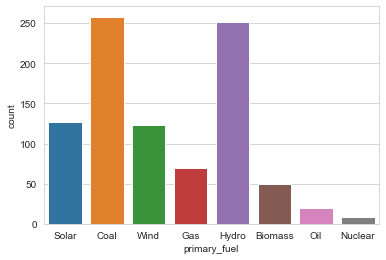

In [23]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=data)

##### EDA

In [33]:
datacorr=data.corr()


<AxesSubplot:>

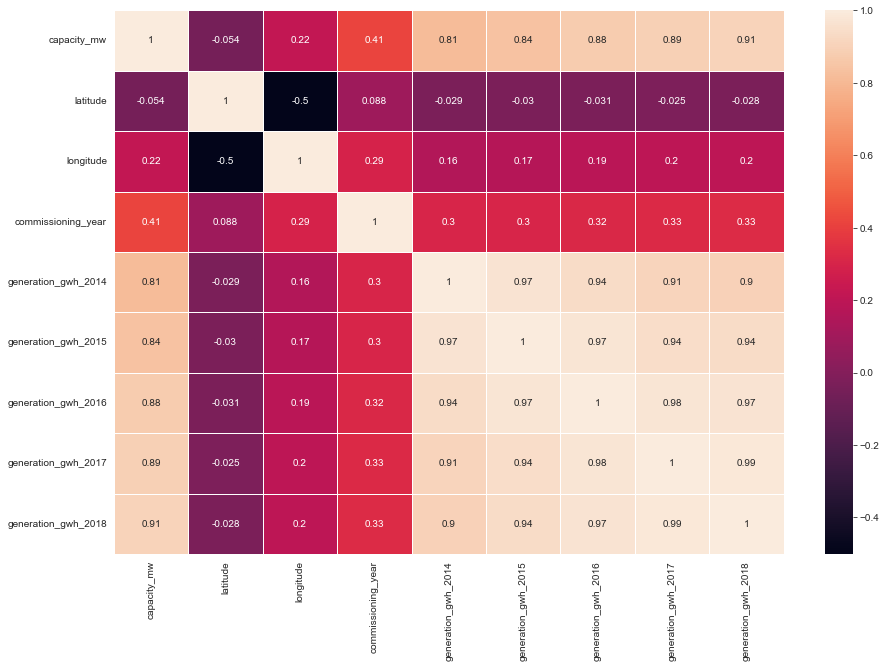

In [34]:
plt.figure(figsize=(15,10))

sns.heatmap(datacorr,annot=True, linewidth=1)

* We can notice generation_gwh_2014,2015,2016,2017,2018 are positively correlated to capacity_mw and 
   latitude is negative correlated with capacity_mw


<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

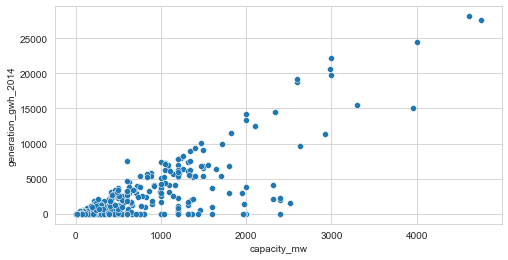

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=data)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

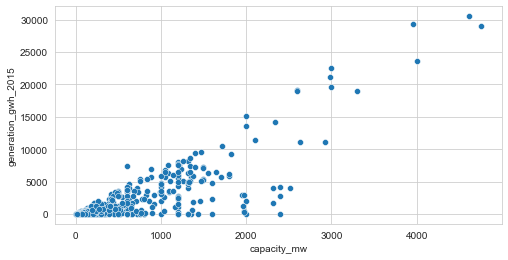

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=data)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

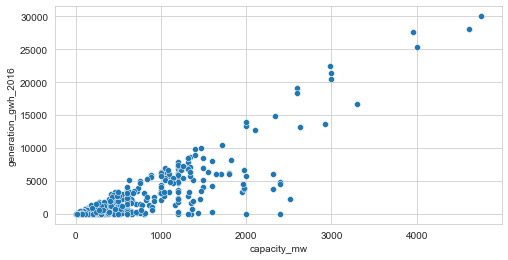

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=data)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

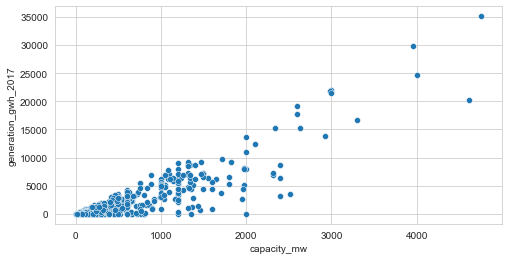

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=data)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

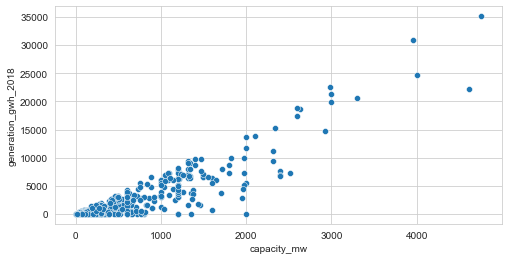

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=data)

* In all these years we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts 

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

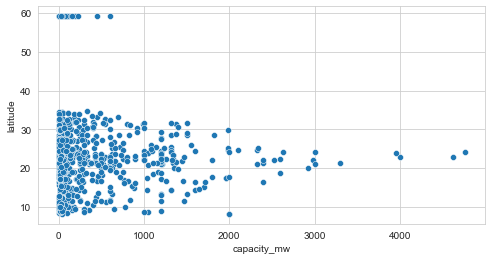

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

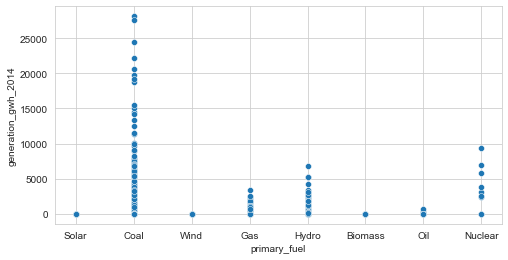

In [45]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=data)

* We can see coal is most used fuel in year 2014 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

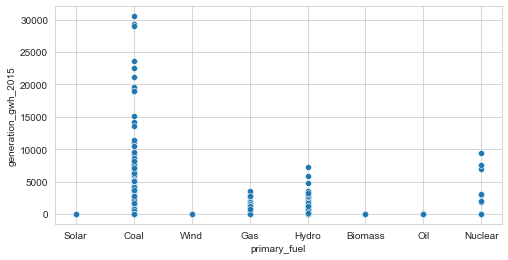

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

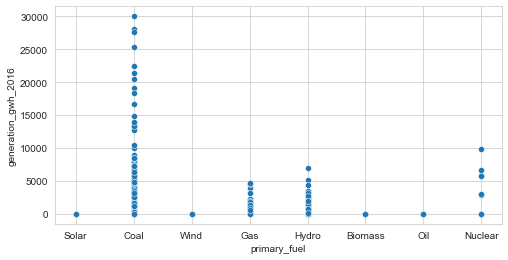

In [48]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

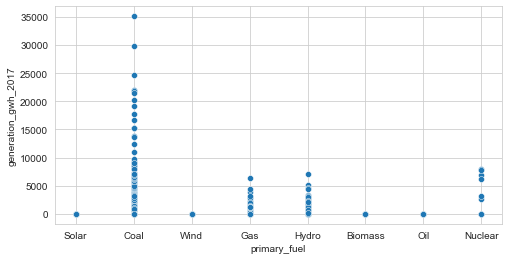

In [49]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

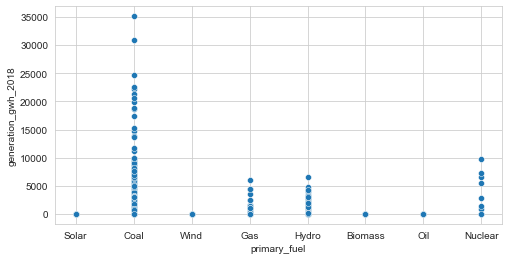

In [50]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=data)

* In all of the year from 2014 to 2018 the coal is most used fuel  and Nuclear,Gas and hydro on average use and Solar,Wind Biomass and oil was very less used.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

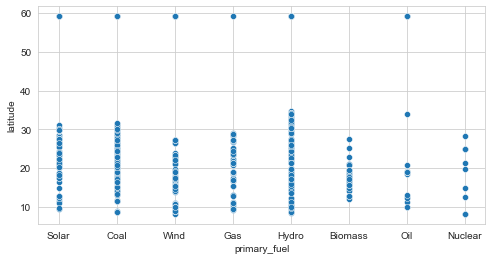

In [51]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=data)

* Coal  and Hydro are  max electrical generating capacity in megawatts

#### LabelEncoder

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [53]:
from sklearn.preprocessing import LabelEncoder


In [54]:
data['primary_fuel'].unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [55]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [56]:
encoder = LabelEncoder()
data['primary_fuel'] = encoder.fit_transform(data['primary_fuel'])
data['geolocation_source'] = encoder.fit_transform(data['geolocation_source'])
data['source'] = encoder.fit_transform(data['source'])

In [57]:
data['geolocation_source'].unique()


array([1, 2, 0])

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


##### Remove Outliers using Zscore

In [59]:
from scipy.stats import zscore

z=np.abs(zscore(data[['generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([0, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 0, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [61]:
z = np.abs(zscore(data[['generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
data1 = data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", data.shape)
print ("Shape of the dataframe after removing outliers: ", data1.shape)
print ("Percentage of data loss post outlier removal: ", (data.shape[0]-data1.shape[0])/data.shape[0]*100)

data=data1.copy()

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (882, 12)
Percentage of data loss post outlier removal:  2.7563395810363835


In [62]:
data.shape

(882, 12)

#####  Skewness Handling

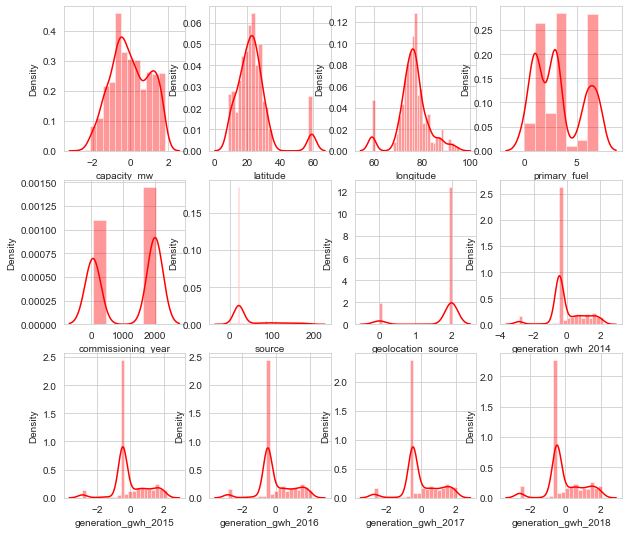

In [86]:
plt.figure(figsize=(10,25))
for i in enumerate(data):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(data[i[1]],color='r')

In [65]:
data.skew()


capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

In [66]:
from sklearn.preprocessing import power_transform

data[['capacity_mw',"generation_gwh_2018",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(data[['capacity_mw',"generation_gwh_2018",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [67]:
data.skew()


capacity_mw            0.016603
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014   -0.016889
generation_gwh_2015   -0.015204
generation_gwh_2016   -0.011726
generation_gwh_2017   -0.006580
generation_gwh_2018   -0.001061
dtype: float64

In [68]:
pd.DataFrame(data).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

 * 'capacity_mw' as target variable creating Regression model

In [69]:
x=data.drop(['capacity_mw'],axis=1)
y=data['capacity_mw']

#### Splitting the data

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.27, random_state=95)


In [159]:
print(X_train.shape)
print(Y_train.shape)

(643, 11)
(643,)


In [160]:
print(X_test.shape)
print(Y_test.shape)

(239, 11)
(239,)


##### LinearRegression

In [161]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [162]:
X_train_prediction = model.predict(X_train)


In [163]:

from sklearn.metrics import r2_score
training_data = r2_score(Y_train, X_train_prediction)
print('At random state , The training accuracy is', training_data)


At random state , The training accuracy is 0.6045946549537975


In [164]:
X_test_prediction = model.predict(X_test)


In [166]:
test_data = r2_score(Y_test, X_test_prediction)
print('At random state , The testing accuracy is', test_data)

At random state , The testing accuracy is 0.5813687522342401


In [167]:
print(f"Linear coefficients : {model.coef_}") 


Linear coefficients : [-0.00830192 -0.0047271  -0.07451721  0.00027715 -0.0014882   0.19515402
 -0.04241648  0.17064773  0.07933128  0.19076349  0.0381092 ]


In [168]:
model.intercept_

0.23266299621222464

In [169]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, X_test_prediction)))

Root Mean Squared Error: 0.6563830107537286


In [170]:
from sklearn.metrics import r2_score
r2_score(Y_test, X_test_prediction)

0.5813687522342401

In [171]:
ab_train = metrics.mean_absolute_error(Y_train, X_train_prediction)
ab_test = metrics.mean_absolute_error(Y_test, X_test_prediction)

print('Mean_absolute_error for training set is {}'.format(ab_train))
print('Mean_absolute_error for test set is {}'.format(ab_test))

Mean_absolute_error for training set is 0.4810661931243454
Mean_absolute_error for test set is 0.5212729729460087


In [172]:
sq_train = metrics.mean_squared_error(Y_train, X_train_prediction)
sq_test = metrics.mean_squared_error(Y_test, X_test_prediction)

print('Mean_squared_error for training set is {}'.format(sq_train))
print('Mean_squared_error for test set is {}'.format(sq_test))


Mean_squared_error for training set is 0.38712266027756803
Mean_squared_error for test set is 0.43083865680612937


##### SVR

In [174]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(X_train,Y_train)



0.5222221283485673


In [180]:
SVR_train_prediction = svr.predict(X_train)


In [181]:
print(SVR_train_prediction)

[-0.50926978 -1.44257617 -1.24336647 -1.29573544 -0.50760106  0.99535986
  0.14908582 -0.3580806  -0.31359733 -0.44392193 -0.31690309  0.44347113
  0.20488108 -0.4978138   0.19263893 -1.23038953  0.52851609  0.33591763
  0.6569234   1.13574942 -0.52758682 -0.50805951  1.20172244 -0.53363412
  1.07551676  1.30404244 -0.20981354 -0.70887521 -1.24642759  0.72710131
 -0.41532433 -1.32279794 -1.17098516  0.18743768  0.2646649  -0.50462211
  0.96273363 -0.06632394 -0.2547602   0.65898312  0.78981061  0.21403152
  0.5042927   0.83315115  0.91083124  0.69508134  0.49494781  0.65805001
 -0.42134406  1.04097837 -0.51260244 -0.78562803  0.39171696  0.77480369
 -0.51429373 -0.51606973 -0.4439154   1.25087338  1.27184942  0.27382527
  0.86487437  0.26582663  0.94264454  1.31847269  0.42669259  0.56854938
 -0.50614897  0.75172611  0.47913794 -1.12596199 -0.33651719 -1.10932786
 -1.18028492  1.0778867   0.14646245  1.00990376 -0.55993683 -0.36477896
  1.20396977  0.15096136 -0.60048725 -1.23967138 -0

In [182]:
SVR_test_prediction = svr.predict(X_test)


In [183]:
print(SVR_test_prediction)

[-0.41330093 -0.44432266 -1.34812035  1.02045809 -0.5088555  -0.55601779
  0.91012307  0.68719076 -0.49489498  1.06609055  0.23482258 -0.60048725
  1.11933203  0.86902361  0.82812534 -0.54722474  0.49353963 -0.4192255
 -0.32754922 -0.50916295  0.4829991  -1.3411084  -0.40207751  0.22840335
 -0.51820406  0.02591846  0.62342485  0.3525979   0.53522429 -1.18853244
  0.49483173 -0.37933879  0.84748995 -0.58595717 -0.54585863 -0.87540459
 -1.38022176  0.47591157 -0.52516755  0.14788675  0.25669305  0.72847826
 -0.52691295 -1.2175312  -1.36008474  0.2981165  -0.51689157 -0.5920032
 -1.20655787 -0.60048725 -0.49740433  0.41347366 -0.51730459  1.05695135
 -1.2270894  -0.53680035  0.8128946   0.06754467  0.27672179  0.55059465
  0.35824833  0.14329435  0.69405637 -0.54562716  0.1619906   0.76157817
 -0.50735566 -0.52183447 -0.39219848  1.0978807  -0.22306418 -0.31218861
 -0.55904168  0.82990815 -0.44805489  2.17342801 -0.0847379   0.20014646
 -1.1314722  -0.60048725  0.14862858 -0.52349851  0.8

In [184]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, SVR_test_prediction)))
r2_score(Y_test, SVR_test_prediction)


ab_train = metrics.mean_absolute_error(Y_train, SVR_train_prediction)
ab_test = metrics.mean_absolute_error(Y_test, SVR_test_prediction)

print('Mean_absolute_error for training set is {}'.format(ab_train))
print('Mean_absolute_error for test set is {}'.format(ab_test))

sq_train = metrics.mean_squared_error(Y_train, SVR_train_prediction)
sq_test = metrics.mean_squared_error(Y_test, SVR_test_prediction)

print('Mean_squared_error for training set is {}'.format(sq_train))
print('Mean_squared_error for test set is {}'.format(sq_test))

Root Mean Squared Error: 0.7087558575513676
Mean_absolute_error for training set is 0.5078618020710707
Mean_absolute_error for test set is 0.5408878907047772
Mean_squared_error for training set is 0.4677697026929288
Mean_squared_error for test set is 0.5023348656133745


##### RandomForestRegressor

In [185]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [186]:
RF_train_prediction = RF.predict(X_train)


In [187]:
print(RF_train_prediction)

[-8.69184667e-01  5.16499414e-01 -7.15971321e-01 -3.91952475e-01
 -1.04636930e+00  1.06851280e+00 -1.19647493e+00 -4.28015947e-01
  3.98259776e-02 -2.53015273e-01 -8.73372039e-01  8.96467616e-01
 -8.44388458e-01 -4.11598316e-01 -6.84937898e-01 -1.73060943e+00
  4.31780658e-01  3.57675181e-02  1.01395644e+00  1.21167529e+00
 -4.79396968e-01 -6.27780757e-01  1.07556681e+00 -1.23997012e-01
  1.38772070e+00  1.61641246e+00  5.72803346e-01  1.27715457e+00
 -1.83098603e+00  1.21455373e+00  3.39459604e-01 -1.23201491e+00
 -9.75894926e-01 -6.44224118e-01 -1.94952267e-01 -1.59922302e+00
  1.19424915e+00  1.54626461e-02  3.39153935e-01  2.17489675e-01
  3.10686281e-01  6.13640578e-01  2.39547978e-01  7.43252810e-01
  4.16246497e-01  7.30047851e-01 -2.61697742e-02  4.44189177e-01
  1.26172410e+00  1.09730855e+00 -1.48563474e-01 -8.21465241e-02
  2.84852126e-01  8.41306004e-01  7.30025962e-03 -8.33220902e-01
 -8.19250133e-01  1.28510009e+00  1.58142923e+00  9.68412322e-01
  1.18341678e+00 -6.90713

In [188]:
RF_test_prediction = RF.predict(X_test)


In [189]:
print(RF_test_prediction)

[ 0.1446431  -0.54384646 -0.74923026  1.10575982 -1.03729168 -0.06639301
  1.02382355  0.60958934 -0.77101069  1.34878472 -0.93293353 -0.5158491
  1.59362355  0.83505918  1.23818227 -0.06161042  0.12262605 -0.1662602
 -0.08295208 -0.55218525  0.06345406 -1.25867602 -0.14775755 -0.69231714
 -0.25882138  1.07797773  0.06470429 -0.84700223  0.57475216 -1.1686627
  1.3740226  -0.68124809  1.22136634 -0.32368711 -0.27548989 -0.31671299
 -0.81799324 -0.02410528 -0.46570183 -1.00649666 -0.53492713  1.2311786
 -0.30800827 -1.48017739 -0.88643875 -0.18718429 -0.20248232 -0.34875435
 -1.22231667 -0.5158491  -0.45284303 -0.14408617 -0.81637685  1.42693821
 -1.0325389  -0.52242732  0.80860511 -1.2335137  -0.58793488  0.21354189
 -0.22557485 -0.80710783  1.2492909  -0.35618802 -1.00185881  1.09983597
 -1.61103314 -0.50375554 -0.09963677  1.56630556  0.11814404 -0.44346804
 -0.54876236  0.80687282 -0.352989    1.42629635  0.72109349 -0.89958188
 -1.31419619 -0.5158491  -0.87145248 -0.47315889  0.994

In [190]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, RF_test_prediction)))
r2_score(Y_test, RF_test_prediction)


ab_train = metrics.mean_absolute_error(Y_train, RF_train_prediction)
ab_test = metrics.mean_absolute_error(Y_test, RF_test_prediction)

print('Mean_absolute_error for training set is {}'.format(ab_train))
print('Mean_absolute_error for test set is {}'.format(ab_test))

sq_train = metrics.mean_squared_error(Y_train, RF_train_prediction)
sq_test = metrics.mean_squared_error(Y_test, RF_test_prediction)

print('Mean_squared_error for training set is {}'.format(sq_train))
print('Mean_squared_error for test set is {}'.format(sq_test))

Root Mean Squared Error: 0.4121068381389735
Mean_absolute_error for training set is 0.12719232575910364
Mean_absolute_error for test set is 0.2950366399586936
Mean_squared_error for training set is 0.0356068085116457
Mean_squared_error for test set is 0.16983204604090207


##### DecisionTreeRegressor

In [191]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [192]:
dtr_train_prediction = dtr.predict(X_train)


In [193]:
dtr_test_prediction = dtr.predict(X_test)


In [194]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, dtr_test_prediction)))
r2_score(Y_test, dtr_test_prediction)


ab_train = metrics.mean_absolute_error(Y_train, dtr_train_prediction)
ab_test = metrics.mean_absolute_error(Y_test, dtr_test_prediction)

print('Mean_absolute_error for training set is {}'.format(ab_train))
print('Mean_absolute_error for test set is {}'.format(ab_test))

sq_train = metrics.mean_squared_error(Y_train, dtr_train_prediction)
sq_test = metrics.mean_squared_error(Y_test, dtr_test_prediction)

print('Mean_squared_error for training set is {}'.format(sq_train))
print('Mean_squared_error for test set is {}'.format(sq_test))

Root Mean Squared Error: 0.5646299633822006
Mean_absolute_error for training set is 0.00959885464923322
Mean_absolute_error for test set is 0.3959142498992879
Mean_squared_error for training set is 0.006693719163164954
Mean_squared_error for test set is 0.3188069955489852


##### HYPER PARAMETER TUNING:
###### GridSearchCV



In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [198]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }


In [200]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)
GF_grid.fit(X_train,Y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(X_test)

GF_grid.best_params_
{'criterion': 'mse', 'n_estimators': 100}

Fitting 10 folds for each of 4 candidates, totalling 40 fits


{'criterion': 'mse', 'n_estimators': 100}

In [201]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, GF_grid_pred)))
r2_score(Y_test, GF_grid_pred)

ab_test = metrics.mean_absolute_error(Y_test, GF_grid_pred)
print('Mean_absolute_error for test set is {}'.format(ab_test))

sq_test = metrics.mean_squared_error(Y_test, GF_grid_pred)
print('Mean_squared_error for test set is {}'.format(sq_test))

Root Mean Squared Error: 0.4088899573524
Mean_absolute_error for test set is 0.29269959804257184
Mean_squared_error for test set is 0.16719099722364753


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

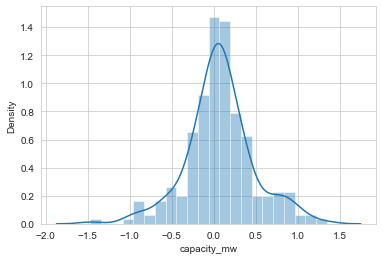

In [204]:
sns.distplot(GF_grid_pred-Y_test)

##### GradientBoostingRegressor

* Selecting 'primary_fuel' as target variable
 * CREATING CLASSIFICATION MODEL


In [ ]:
#Dividing data into X and Y


In [209]:
x=data.drop(['primary_fuel'],axis=1)
y=data['primary_fuel']


In [211]:
x.shape



(882, 11)

In [212]:

y.shape

(882,)

In [214]:
#Spliting Train and Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=48)


In [215]:
x_train.shape


(643, 11)

In [216]:
x_test.shape



(239, 11)

In [217]:
y_train.shape



(643,)

In [218]:
y_test.shape

(239,)

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


cross validation score: 0.5362801746276322


In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5146443514644351
[[ 0  2  0  0  0  0  9  2]
 [ 0  4  0 49  0  0 11  5]
 [ 0  5  0 16  0  0  1  0]
 [ 0  1  0 61  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  3  1]
 [ 1  1  0  0  0  0 21  6]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.29      0.06      0.10        69
           2       0.00      0.00      0.00        22
           3       0.48      0.98      0.64        62
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.47      0.72      0.57        29
           7       0.73      1.00      0.84        37

    accuracy                           0.51       239
   macro avg       0.24      0.35      0.27       239
weighted avg       0.38      0.51      0.39       239

Training accuracy:: 0.5567651632970451
Test accuracy:: 0.5146443514644351


##### DECISION TREE CLASSIFIER


In [225]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.8140472521828453


In [226]:

dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))


0.7907949790794979
[[10  3  0  0  0  0  0  0]
 [ 3 49  8  6  2  1  0  0]
 [ 0  7  8  6  0  1  0  0]
 [ 0  6  1 54  1  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.72      0.71      0.72        69
           2       0.42      0.36      0.39        22
           3       0.82      0.87      0.84        62
           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         6
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        37

    accuracy                           0.79       239
   macro avg       0.65      0.63      0.64       239
weighted avg       0.79      0.79      0.79       239

Training accuracy:: 1.0
Test accuracy:: 0.7907949790794979


In [228]:
# To create Dataframe of predicted value with particular respective index
result2 = pd.DataFrame()  #target data
result2['Prediction of Test data']=X_test_prediction
result2

,Prediction of Test data
0,-0.221749
1,-0.176873
2,-1.247327
3,0.888580
4,-0.559915
...,...
234,-0.574341
235,0.183737
236,0.093610
237,0.513707


In [230]:
# To create Dataframe of predicted value with particular respective index
result1 = pd.DataFrame()  #target data
result1['Prediction of Train data']=X_train_prediction
result1

,Prediction of Train data
0,-0.509270
1,-1.442576
2,-1.243366
3,-1.295735
4,-0.507601
...,...
638,1.173759
639,-1.314137
640,1.249099
641,-0.519233


In [231]:
data_row= pd.concat([result1, result2],ignore_index=True)

In [232]:
data_row

,Prediction of Train data,Prediction of Test data
0,-0.509270,NaN
1,-1.442576,NaN
2,-1.243366,NaN
3,-1.295735,NaN
4,-0.507601,NaN
...,...,...
877,NaN,-0.574341
878,NaN,0.183737
879,NaN,0.093610
880,NaN,0.513707


In [233]:
#save the dataframe into csv file
data_row.to_csv('Global Power Plant.csv')